In [1]:

import pandas as pd 
import numpy as np  
from scipy import stats  
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 

plt.style.use('ggplot')

In [4]:
#reading in the data 
df = pd.read_csv("real_estate_data.csv",) 

df = df.drop("Unnamed: 0", axis = 1)  

df['property_type'] = df['property_type'].str.replace('Condop', 'Condo').str.replace('Townhome','Townhouse')

df['total_rooms'] =  df['baths'] + df['beds']
df.head()

,area,baths,beds,have_beds,price,property_type,sqft,year_built,zipcode,high_payment,low_payment,low_monthly,high_monthly,annual_income_high,annual_income_low,total_rooms
0,"Manhattan, NY, 10023",1.0,0.0,Studio,555000,Co-op,570,1964.0,10023,111000.0,27750.0,1465.0,1233.0,49320,58600,1.0
1,"New York, NY, 10014",1.0,0.0,Studio,499000,Co-op,NaN,1940.0,10014,99800.0,24950.0,1317.0,1109.0,44360,52680,1.0
2,"New York, NY, 10022",4.5,3.0,bed,16995000,Condo,"4,003",2015.0,10022,3399000.0,849750.0,44848.0,37767.0,1510680,1793920,7.5
3,"Manhattan, NY, 10001",1.0,0.0,Studio,325000,Co-op,"14,000",1929.0,10001,65000.0,16250.0,858.0,722.0,28880,34320,1.0
4,"Manhattan, NY, 10022",2.0,2.0,bed,895000,Co-op,850,1962.0,10022,179000.0,44750.0,2362.0,1989.0,79560,94480,4.0


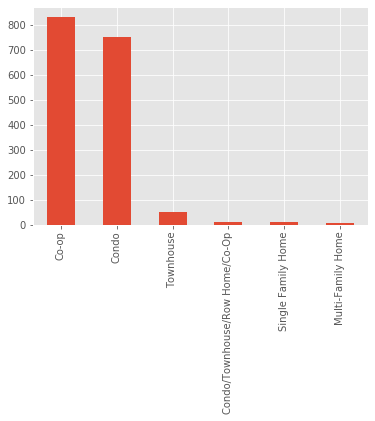

In [17]:
#looking at the number of the different types of houses 
#Manhattan largely consists of co-ops and condos  
#make boxplots of this like property type vs price 
group = df.groupby('property_type')

#barplot of the number of property types
df['property_type'].value_counts().plot.bar()

#group['price'].median().sort_values().plot.bar()
#group['total_rooms'].median().sort_values(ascending = False).plot.bar()

In [ ]:
#comeback to zipcode 

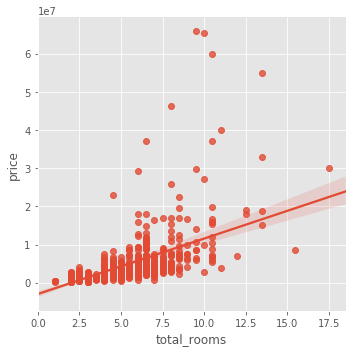

In [18]:
#looking at rooms vs price 
major_props = ['Co-op', 'Condo']
df_filt = df[df['property_type'].isin(major_props)] 

#sns.lmplot('total_rooms', 'price', df_filt, col = 'property_type')
sns.lmplot('total_rooms', 'price', df_filt)

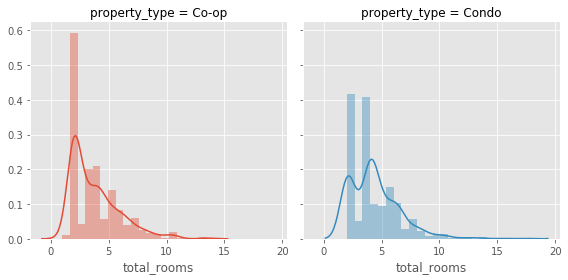

In [59]:
#looking at rooms by property type  

plotgrid = sns.FacetGrid(df_filt, col = "property_type", hue = "property_type", height = 4) 

plotgrid.map(sns.distplot, 'total_rooms')

C:\Users\bpj25\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


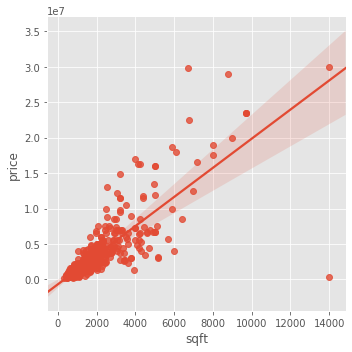

In [19]:
#looking at sqft vs price 
#cleaning the sqft column
df_sqft = df.dropna(axis = 0, how = 'any') 
sqft = df_sqft['sqft'].str.replace(',','')
df_sqft['sqft'] = [int(x) for x in sqft]

sns.lmplot('sqft', 'price', df_sqft)

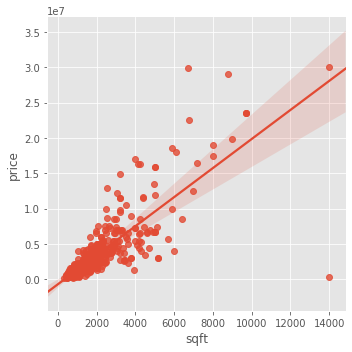

In [70]:
sns.lmplot('sqft', 'price', df_sqft,)

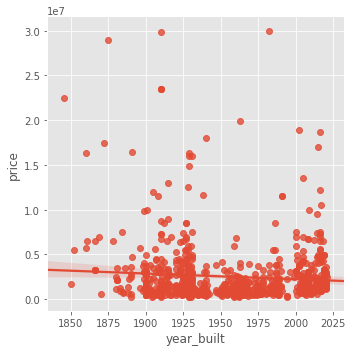

In [71]:
sns.lmplot('year_built', 'price', df_sqft) 
#Looking at the correlation between year estate was built and price


In [72]:
#Looking at the correlation between year estate was built and price
df_sqft['year_built']

0       1964.0
2       2015.0
3       1929.0
4       1962.0
5       1959.0
         ...  
1652    1928.0
1654    1917.0
1655    1910.0
1657    1975.0
1661    1941.0
Name: year_built, Length: 895, dtype: float64

In [85]:
#zipcode only useful if figure how to map data
group1 = df.groupby('zipcode')
print(group1.size()) 
group1[['price']].median()


zipcode
10001     25
10002     43
10003     70
10004      8
10005     25
10006      5
10007     31
10009     24
10010     63
10011     93
10012     26
10013     49
10014     58
10016    107
10017     39
10018      1
10019     86
10021     95
10022    105
10023     91
10024     71
10025     67
10026     26
10027     24
10028     65
10029     11
10030      8
10031      7
10032      5
10033     17
10035     12
10036     19
10037      4
10038     19
10039      3
10040      4
10044      4
10065     75
10069     39
10075     47
10128     76
10280     12
10282      3
dtype: int64


,price
zipcode,
10001,2295000.0
10002,870000.0
10003,1372500.0
10004,856500.0
10005,1550000.0
10006,1720000.0
10007,4495000.0
10009,1202500.0
10010,1895000.0


In [26]:
#make a pearson correlation  

corr_table = df_sqft.corr(method = 'pearson') 

corr_table[['price']] 

#price is postiviely correlated with total rooms, and sqft all other variables are weakly correlated 

,price
baths,0.738537
beds,0.634562
price,1.000000
sqft,0.834168
year_built,-0.076856
zipcode,-0.025091
high_payment,1.000000
low_payment,1.000000
low_monthly,1.000000
high_monthly,1.000000


In [28]:
testing = df_sqft.drop('baths', axis = 1).drop('beds', axis = 1) #getting rid of beds and baths does not affect correlation

testing.corr(method = 'pearson')['price']

price                 1.000000
sqft                  0.834168
year_built           -0.076856
zipcode              -0.025091
high_payment          1.000000
low_payment           1.000000
low_monthly           1.000000
high_monthly          1.000000
annual_income_high    1.000000
annual_income_low     1.000000
total_rooms           0.708416
Name: price, dtype: float64

In [ ]:
#looking at the prices now 

